# Quiz

어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원(total), 식수 인원(reception)을 각각의 변수로 저장하시오.

In [23]:
import os, sys
os.chdir("/Users/choeunsol/Python/나도코딩 - 파이썬 스터디/PythonMLWorkspace(LightWeight)/ScikitLearn")
sys.path.append(os.pardir)
dataset = pd.read_csv("QuizData.csv")
print(dataset)

    total  reception
0     118         62
1     253        148
2     320        201
3      94         80
4     155         92
5     188        131
6     201        147
7     338        187
8     186        124
9     183        152
10    223        143
11    392        199
12     86         58
13    112         68
14    129         76
15    223        149
16    288        152
17    262        183
18    143         88
19    179        101


In [24]:
total = dataset.iloc[:, 0].values.reshape(-1,1)
reception = dataset.iloc[:, 1].values.reshape(-1,1)

## 2) 전체 데이터를 훈련 세트와 테스트 셋으로 분리하시오. 이 때 비율은 75 : 25로 합니다.

단, random_state = 0 으로 설정

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(total, reception, test_size = 0.25, random_state = 0)

## 3) 훈련 세트를 이용하여 단순 선형 회귀 모델을 생성하시오.

In [30]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

## 4) 데이터 시각화(훈련 세트) 코드를 작성하시오.

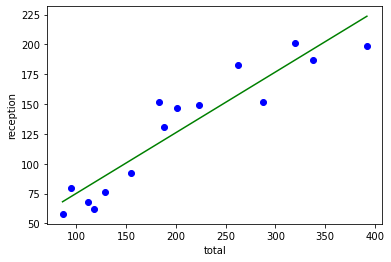

In [48]:
coef = regression.coef_
intercept = regression.intercept_
graph_x = np.arange(np.min(x_train), np.max(x_train), 0.01)
graph_y = coef * graph_x + intercept
graph_y = graph_y.reshape(-1)

plt.scatter(x_train, y_train, c = 'blue')
plt.plot(graph_x, graph_y, c = 'green')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

## 6) 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [46]:
# 훈련 세트 모델 평가 점수 [R^2]
regression.score(x_train, y_train)

0.8707088403321211

In [49]:
# 테스트 세트 모델 평가 점수 [R^2]
regression.score(x_test, y_test)

0.8634953212566615

## 7) 결혼식 참석 인원이 300명일 때 예상되는 식수 인원을 구하시오.

In [52]:
regression.predict([[300]])

array([[176.92793218]])

결혼식 참석 인원 300명에 대한 예상 식수 인원은 177명이다.